## Code for comparing and fine tuning susceptibility values </br>

This code requires you to be able of creating different simulated fieldmaps where 1 value can be dinamically changed. </br>
This notebook will also have an option to display figures and statistics (for validation of FM comparison values in terms of a varying susceptibility label)

In [78]:
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def convert_ppm_to_Hz(nifti_ppm, B0):
    fm_ppm = nifti_ppm.get_fdata()
    # When creating fieldmaps with susceptiblity to fieldmap repository, the output will be in PPM so we need to rescale to Tesla
    gamma = 42.58 # [Hz/T] 
    f0 = B0*gamma
    fm_Hz = fm_ppm*f0
    return fm_Hz

# PPM to Hz convertion </br>
 Load the output from *susceptibility_to_fieldmap* repo (fbfestimation) which has units PPM to get it converted to Hz

In [23]:
# Importing the fieldmaps 
fm_ppm_og = nib.load("C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/fms/with_trachea/custom_5_40_percent/custom5_crop_fm_ppm.nii.gz")
fm_ppm_PAM50 = nib.load("C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/sub-amuVC_T1w_fmap_b0-sim.nii.gz")
fm_new_ppm = nib.load("C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/fms/PAM50_comp/custom6_crop_mb_ppm.nii.gz")


In [24]:
fm_Hz = convert_ppm_to_Hz(fm_new_ppm,3)
# Saving the new FM in Hz with the affine of input ppm image!
new_img = nib.Nifti1Image(fm_Hz, affine = fm_new_ppm.affine)
# Select a name according to the input fieldmap
nib.save(new_img,"C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/fms/PAM50_comp/custom6_crop_mb_Hz.nii.gz")


# FM Comparison plotting </br>
Code for plotting and comparing 2 or >2 slice-wise FM average values across diferent vertebrae levels

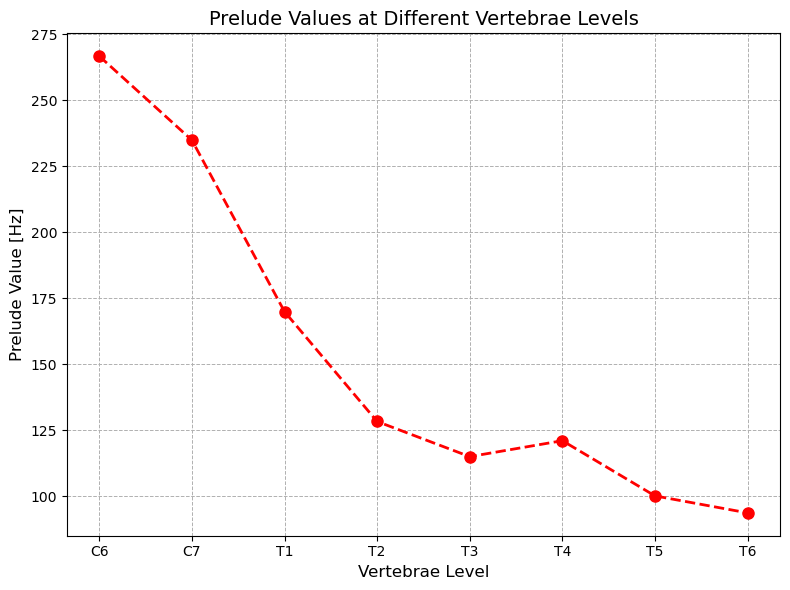

In [83]:

# Data for vertebrae levels and prelude values
vertebrae_levels_c6_t6 = ['C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6']
prelude_c6_t6= [266.76, 234.93, 169.97, 128.37, 115.06, 121.10, 100.19, 93.75]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(vertebrae_levels_c6_t6, prelude_c6_t6, marker='o', color='r', linestyle='--', linewidth=2, markersize=8)

# Add titles and labels
plt.title('Prelude Values at Different Vertebrae Levels', fontsize=14)
plt.xlabel('Vertebrae Level', fontsize=12)
plt.ylabel('Prelude Value [Hz]', fontsize=12)

# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [16]:
# Data for vertebrae levels with the BIG FOV vs ROMEO
# labeles 1 through 15
vertebrae_levels_c1_t8 = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8']
romeo_all_fov = [46.09, 47.78, 61.17, 119.09, 190.46, 270.79, 308.63, 256.27, 171.73, 145.12, 137.50, 124.69, 113.77, 106.44, 102.05] # in vivo measured FM
simulated_big_fov = [None, None, -251.7194, -293.6238, -269.1196, -309.2655, -282.1700, -266.7934, -272.1983, -254.7847, -287.6560, -287.1892, -296.2160, -334.8481, -303.5019] # Using T1w magnitude and segmentations
# Remember that T1W and GRE are slightly shifted from one another so the simulated will be slightly different than the real one.
# Also, do not forget that theres breathing movement so lung volume might not be the same.

len(vertebrae_levels_c1_t8)

15

In [18]:
# Charles AMU PAM50 sim FM project
# 15 values
amu_VC = [-261.50, -284.79, -289.26, -269.99, -240.14, -204.11, -181.67, -207.40, -244.12, -250.29, -276.19, -290.33, -305.95, -305.00, -288.75] # Using -4.2 chi for lungs and trachea
len(amu_VC)

15

In [7]:
# Data for vertebrae levels and prelude values

vertebrae_levels = ['C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7']

simulated_custom1 = [-235.68, -224.49, -270.97, -271.70, -267.70, -283.41, -292.96, -264.28] # Air in lungs and trachea = 0.2
simulated_custom2 = [-279.61, -255.1496, -271.21, -272.25, -275.12, -286.55, -286.97, -268.84] # Trachea 0.2 Lungs -4.84
simulated_custom3 = [-275.16, -250.78, -270.73, -272.15, -274.49, -286.40, -287.95, -268.9] # Trachea and Lungs -4.2

simulated_charles = [-295, -325, -348, -320, -282, -250, -260, -270]




In [27]:
vertebrae_levels_c4_t7 = ['C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7']
simulated_custom4 = [-121.18, -124.086, -119.14, -108.53, -129.45, -154.95, -150.40, -147.33, -158.98, -167.47, -151.59]
#simulated_custom4 = [-121.18, -124.08, -119.15, -108.53, -241.15, -290.17, -299.07, -300.38, -287.60, -235.43, -219.84] # same chi values as custom 3, trachea lungs -4.2
# Custom 5 is using the physiological prior that lungs are filled with around 40% of air 
simulated_custom5 = [-111.89, -115.52, -109.41, ]

# Custom 6 is used the same values as MB tests
simulated_custom6 = [-180.06, -184.62, -176.44, -167.33, -195.04, -237.48, -249.12, -249.47, -247.45, -222.32, -151.60]
simulated_custom6_crop = [-67.95, -46.48, -17.50, 5.9, -15.80, -61.53, -79.25, -90.59, -106.72, -111.92, -91.56]
# ROMEO in vivo 3 echo cropped
romeo_c4_t7 = [ 119.09, 190.46, 270.79, 308.63, 256.27, 171.73, 145.12, 137.50, 124.69, 113.77, 106.44] 


In [28]:
# Check length of each in case it can't plot
len(simulated_custom6_crop)

11

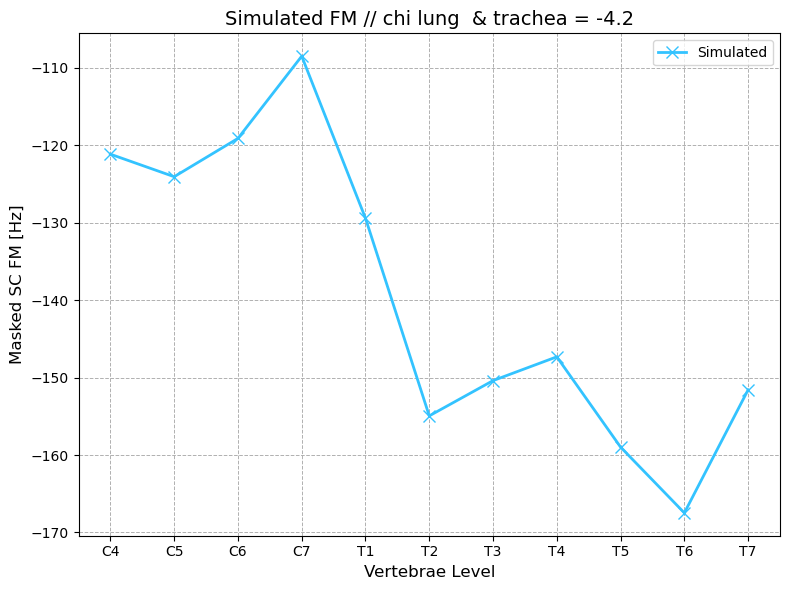

In [92]:
# Create the plot
plt.figure(figsize=(8, 6))

# Plot ROMEO vlaues
#plt.plot(vertebrae_levels, simulated_custom2, marker='o', color='#FF5733', linestyle='--', linewidth=2, markersize=8, label = "Simulated GRE FOV")


# Plot Simulated Big FOV values
#plt.plot(vertebrae_levels, romeo_c4_t7, marker='o', color='#FF5733', linestyle='--', linewidth=2, markersize=8, label='In-vivo ROMEO')

plt.plot(vertebrae_levels_c4_t7, simulated_custom4, marker='x', color='#33C3FF', linestyle='-', linewidth=2, markersize=8, label='Simulated')

# Add titles and labels
plt.title('Simulated FM // chi lung  & trachea = -4.2', fontsize=14)
plt.xlabel('Vertebrae Level', fontsize=12)
plt.ylabel('Masked SC FM [Hz]', fontsize=12)

plt.legend()
# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

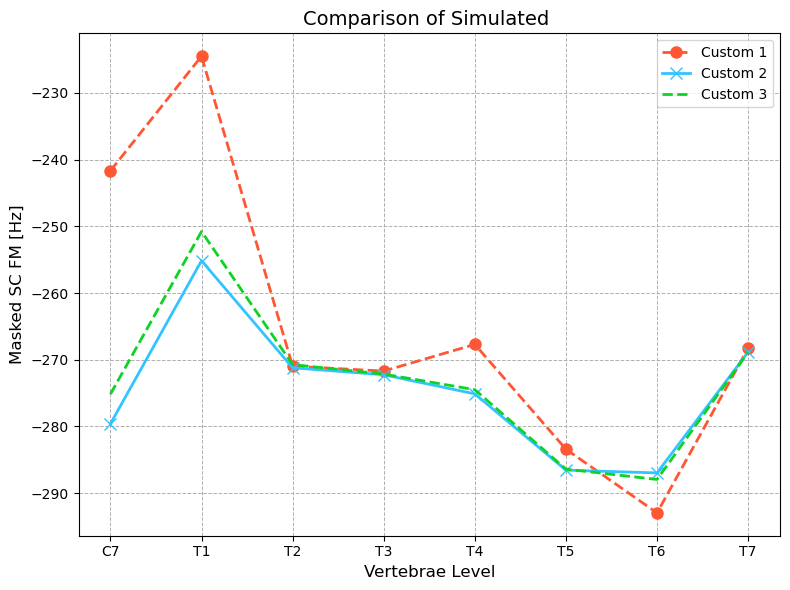

In [40]:
# Create the plot
plt.figure(figsize=(8, 6))

# Plot ROMEO vlaues
plt.plot(vertebrae_levels, simulated_custom1, marker='o', color='#FF5733', linestyle='--', linewidth=2, markersize=8, label = "Custom 1")


# Plot Simulated Big FOV values
plt.plot(vertebrae_levels, simulated_custom2, marker='x', color='#33C3FF', linestyle='-', linewidth=2, markersize=8, label='Custom 2')
plt.plot(vertebrae_levels, simulated_custom3, marker='', color='#0DD325', linestyle='--', linewidth=2, markersize=8, label='Custom 3')


# Add titles and labels
plt.title('Comparison of Simulated ', fontsize=14)
plt.xlabel('Vertebrae Level', fontsize=12)
plt.ylabel('Masked SC FM [Hz]', fontsize=12)

plt.legend()
# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Plotting properly 

In [40]:
AMU_img = nib.load("C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/sub-amuVC_fmap_Hz.nii.gz")
custom6_img = nib.load("C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/fms/PAM50_comp/custom6_mb_Hz.nii.gz")
custom6_qmask_img = nib.load("C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/masks/smooth_complete_sc_mask.nii.gz")

In [52]:
AMU_data = AMU_img.get_fdata()
custom6_data = custom6_img.get_fdata()
#custom6_qmask_data = custom6_qmask_img.get_fdata()

In [51]:
AMU_avg = np.mean(AMU_data)
AMU_avg

np.float64(-122.76480609823825)

In [55]:
custom6_avg = np.mean(custom6_data)
custom6_avg

np.float64(-131.00615232588117)

In [100]:
# For in vivo measurement:
db0_030_img = nib.load("C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/FM_tests/ROMEO_results/test10_all_sc_smooth/B0.nii")
db0_30_qmask_img = nib.load("C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/masks/smooth_complete_sc_mask.nii.gz")

In [101]:
db0_30_data = db0_030_img.get_fdata()
db0_30_qmask_data = db0_30_qmask_img.get_fdata()

In [102]:
db0_30_masked = db0_30_data[db0_30_qmask_data==1]
db0_030_avg = np.mean(db0_30_masked)
db0_030_avg

np.float64(166.90503929042185)

In [105]:
AMU_demod = AMU_data - AMU_avg
custom6_demod = custom6_data - custom6_avg
db0_030_demod = db0_30_data - db0_030_avg

In [69]:
# Loading the vertebrae level masks for AMU
AMU_SClab_img = nib.load("C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/eroded3_vert_labels_AMU_VC.nii.gz")
ANU_SClab_data = AMU_SClab_img.get_fdata()



In [124]:
# For AMU VC
!sct_extract_metric -i "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/sub-amuVC_fmap_Hz.nii.gz" -f "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/spinal_cord_AMU_VC.nii.gz" -method wa -vert 1:14 -vertfile "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/eroded3_vert_labels_AMU_VC.nii.gz" -perlevel 1 -o "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/AMU_VC_extract_metrics.csv"


--
Spinal Cord Toolbox (6.2)

sct_extract_metric -i C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/sub-amuVC_fmap_Hz.nii.gz -f C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/spinal_cord_AMU_VC.nii.gz -method wa -vert 1:14 -vertfile C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/eroded3_vert_labels_AMU_VC.nii.gz -perlevel 1 -o C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/AMU_VC_extract_metrics.csv
--


Load metric image...
Estimation for label: spinal_cord_AMU_VC

Done! To view results, type:
start C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/AMU_VC_extract_metrics.csv



In [76]:
# Extract metrics for db030
!sct_extract_metric -i "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/FM_tests/ROMEO_results/test10_all_sc_smooth/B0.nii" -f "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/only_sc.nii.gz" -method wa -vert 1:14 -vertfile "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/sct_output/only_sc_labeled.nii.gz" -o "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/db0_030_metrics.csv" -perlevel 1


--
Spinal Cord Toolbox (6.2)

sct_extract_metric -i C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/FM_tests/ROMEO_results/test10_all_sc_smooth/B0.nii -f C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/only_sc.nii.gz -method wa -vert 1:14 -vertfile C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/sct_output/only_sc_labeled.nii.gz -o C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/db0_030_metrics.csv -perlevel 1
--


Load metric image...
Estimation for label: only_sc

Done! To view results, type:
start C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/db0_030_metrics.csv



In [75]:
# Extract metric for simulated custom 6
!sct_extract_metric -i "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/fms/PAM50_comp/custom6_mb_Hz.nii.gz" -f "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/custom6_mb_sc.nii.gz" -method wa -vert 4:14 -vertfile "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/sc_labeled_c4t7.nii.gz" -o "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/custom6_extract_metrics.csv" -perlevel 1


--
Spinal Cord Toolbox (6.2)

sct_extract_metric -i C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/fms/PAM50_comp/custom6_mb_Hz.nii.gz -f C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/custom6_mb_sc.nii.gz -method wa -vert 4:14 -vertfile C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/sc_labeled_c4t7.nii.gz -o C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/custom6_extract_metrics.csv -perlevel 1
--


Load metric image...
Estimation for label: custom6_mb_sc

Done! To view results, type:
start C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/custom6_extract_metrics.csv



In [125]:
path_to_extract_metric_folder = "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics"

#########
AMU_CV_csv = os.path.join(path_to_extract_metric_folder, "AMU_VC_extract_metrics.csv")
df_amu_cv= pd.read_csv(AMU_CV_csv)
AMU_CV_wa_data = df_amu_cv['WA()']

db0_30_csv = os.path.join(path_to_extract_metric_folder, "db0_030_metrics.csv")
df_db0_030 = pd.read_csv(db0_30_csv)
db0_030_wa_data = df_db0_030['WA()']

custom6_csv = os.path.join(path_to_extract_metric_folder, "custom6_extract_metrics.csv")
df_custom6 = pd.read_csv(custom6_csv)
custom6_wa_data = df_custom6['WA()']

vertebrae_levels_c1_t7 = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7']


In [123]:
len(AMU_CV_wa_data)

15

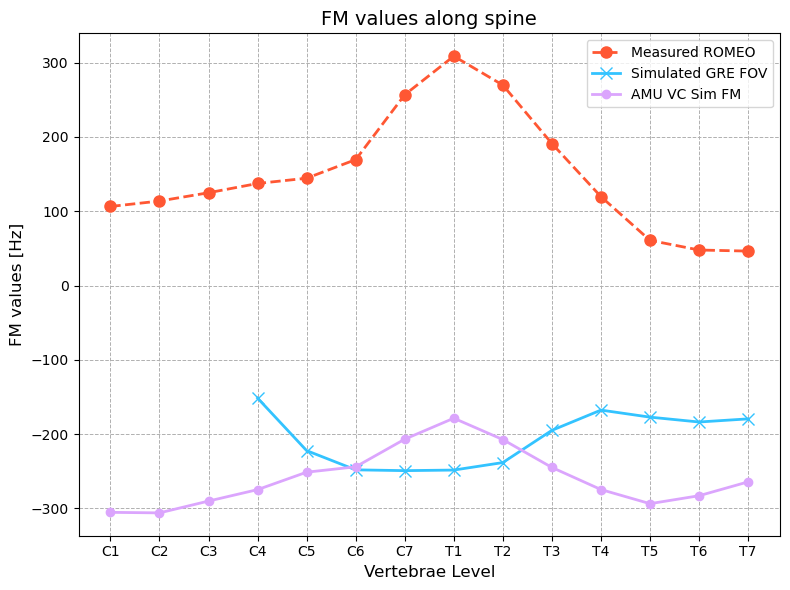

In [126]:
# Not demodulated
# Create the plot
plt.figure(figsize=(8, 6))

# ROMEO
plt.plot(vertebrae_levels_c1_t7, db0_030_wa_data, marker = 'o', color = '#FF5733', linestyle='--', linewidth = 2, markersize = 8, label = "Measured ROMEO")
plt.plot(vertebrae_levels_c4_t7, custom6_wa_data, marker = 'x', color = '#33C3FF', linestyle='-', linewidth = 2, markersize = 8, label ='Simulated GRE FOV')
plt.plot(vertebrae_levels_c1_t7, AMU_CV_wa_data, marker='o', linestyle='-', color='#DBA5FD', label='AMU VC Sim FM', linewidth=2)
# Plot Simulated demodulated values
#plt.plot(vertebrae_levels_c7_t7, abs_sim_custom3, )


# Add titles and labels
plt.title('FM values along spine', fontsize=14)
plt.xlabel('Vertebrae Level', fontsize=12)
plt.ylabel('FM values [Hz]', fontsize=12)

plt.legend()
# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Demodulating and plotting properly

AMU_demod = AMU_data - AMU_avg
custom6_demod = custom6_data - custom6_avg
db0_030_masked = db0_30_masked - db0_030_avg

In [107]:
# We need to save all the demodulated files!
demod_AMU_new_img = nib.Nifti1Image(AMU_demod, affine = AMU_img.affine)
demod_custom6_new_img= nib.Nifti1Image(custom6_demod, affine = custom6_img.affine)
demod_db0_030_new_img = nib.Nifti1Image(db0_030_demod, affine = db0_030_img.affine)

In [108]:
nib.save(demod_AMU_new_img,"C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/demod_AMU_img.nii.gz")
nib.save(demod_custom6_new_img,"C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/demod_custom6_img.nii.gz")
nib.save(demod_db0_030_new_img,"C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/demod_db0_030_img.nii.gz")

In [110]:
# For custom 6, only replace the -i folder and indicate the demod output folder under extract_metrics
!sct_extract_metric -i "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/demod_custom6_img.nii.gz" -f "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/custom6_mb_sc.nii.gz" -method wa -vert 4:14 -vertfile "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/sc_labeled_c4t7.nii.gz" -o "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/demod/demod_custom6_extract_metrics.csv" -perlevel 1



--
Spinal Cord Toolbox (6.2)

sct_extract_metric -i C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/demod_custom6_img.nii.gz -f C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/custom6_mb_sc.nii.gz -method wa -vert 4:14 -vertfile C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/sc_labeled_c4t7.nii.gz -o C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/demod/demod_custom6_extract_metrics.csv -perlevel 1
--


Load metric image...
Estimation for label: custom6_mb_sc

Done! To view results, type:
start C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/demod/demod_custom6_extract_metrics.cs

In [111]:
# For ROMEO FM - in vivo
!sct_extract_metric -i "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/demod_db0_030_img.nii.gz" -f "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/only_sc.nii.gz" -method wa -vert 1:14 -vertfile "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/sct_output/only_sc_labeled.nii.gz" -o "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/demod/demod_db0_030_metrics.csv" -perlevel 1


--
Spinal Cord Toolbox (6.2)

sct_extract_metric -i C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/demod_db0_030_img.nii.gz -f C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/only_sc.nii.gz -method wa -vert 1:14 -vertfile C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/sct_output/only_sc_labeled.nii.gz -o C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/demod/demod_db0_030_metrics.csv -perlevel 1
--


Load metric image...
Estimation for label: only_sc

Done! To view results, type:
start C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/demod/demod_db0_030_metrics.csv



In [113]:
!sct_extract_metric -i "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/demod_AMU_img.nii.gz" -f "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/spinal_cord_AMU_VC.nii.gz" -method wa -vert 1:15 -vertfile "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/eroded3_vert_labels_AMU_VC.nii.gz" -perlevel 1 -o "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/demod/demod_AMU_VC_extract_metrics.csv"


--
Spinal Cord Toolbox (6.2)

sct_extract_metric -i C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/demod_AMU_img.nii.gz -f C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/spinal_cord_AMU_VC.nii.gz -method wa -vert 1:15 -vertfile C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/eroded3_vert_labels_AMU_VC.nii.gz -perlevel 1 -o C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/demod/demod_AMU_VC_extract_metrics.csv
--


Load metric image...
Estimation for label: spinal_cord_AMU_VC

Done! To view results, type:
start C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/demod/demod_AMU_VC_ext

In [115]:
path_to_demod_extract_metric_folder = "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/demod"

#########
demod_AMU_CV_csv = os.path.join(path_to_demod_extract_metric_folder, "demod_AMU_VC_extract_metrics.csv")
demod_df_amu_cv= pd.read_csv(demod_AMU_CV_csv)
demod_AMU_CV_wa_data = demod_df_amu_cv['WA()']

demod_db0_30_csv = os.path.join(path_to_demod_extract_metric_folder, "demod_db0_030_metrics.csv")
demod_df_db0_030 = pd.read_csv(demod_db0_30_csv)
demod_db0_030_wa_data = demod_df_db0_030['WA()']

demod_custom6_csv = os.path.join(path_to_demod_extract_metric_folder, "demod_custom6_extract_metrics.csv")
demod_df_custom6 = pd.read_csv(demod_custom6_csv)
demod_custom6_wa_data = demod_df_custom6['WA()']

#vertebrae_levels_c1_t7 = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7']

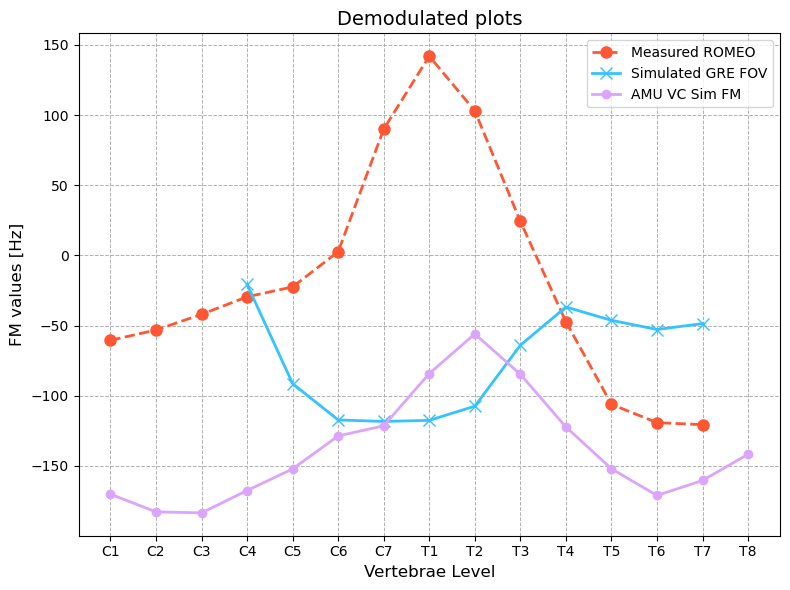

In [116]:
# Demodulated
# Create the plot
plt.figure(figsize=(8, 6))

# ROMEO
plt.plot(vertebrae_levels_c1_t7, demod_db0_030_wa_data, marker = 'o', color = '#FF5733', linestyle='--', linewidth = 2, markersize = 8, label = "Measured ROMEO")
plt.plot(vertebrae_levels_c4_t7, demod_custom6_wa_data, marker = 'x', color = '#33C3FF', linestyle='-', linewidth = 2, markersize = 8, label ='Simulated GRE FOV')
plt.plot(vertebrae_levels_c1_t8, demod_AMU_CV_wa_data, marker='o', linestyle='-', color='#DBA5FD', label='AMU VC Sim FM', linewidth=2)
# Plot Simulated demodulated values
#plt.plot(vertebrae_levels_c7_t7, abs_sim_custom3, )


# Add titles and labels
plt.title('Demodulated plots', fontsize=14)
plt.xlabel('Vertebrae Level', fontsize=12)
plt.ylabel('FM values [Hz]', fontsize=12)

plt.legend()
# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Demodulating with custom Frequency 

In [24]:
# Instead of demodulating from difference at a selected vertebral level
# We can use the ImagingFrequency": 123.249218 from the json file 
# from the measured prelude FM

# Lets try to offset by the value at C6 for both AMU VC and ROMEO

true_demod_factor = 166
true_demodded_simulated = [simulated_custom4[i] + true_demod_factor for i in range(len(simulated_custom4))]

true_demodded_simulated2 = [simulated_custom4[i] + true_demod_factor for i in range(len(simulated_custom4))]



In [128]:
demod_at_c6_AMU_CV = [AMU_CV_wa_data[i]- AMU_CV_wa_data[5] for i in range(len(AMU_CV_wa_data))]     


In [130]:
demod_at_c6_db0_030 = [db0_030_wa_data[i]- db0_030_wa_data[5] for i in range(len(db0_030_wa_data))]  

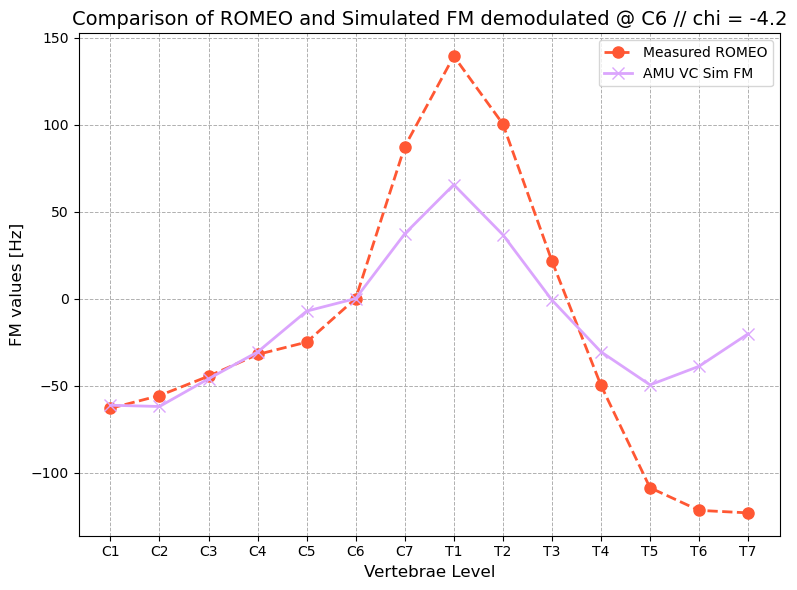

In [134]:
# Create the plot
plt.figure(figsize=(8, 6))

# ROMEO
plt.plot(vertebrae_levels_c1_t7, demod_at_c6_db0_030, marker='o', color='#FF5733', linestyle='--', linewidth=2, markersize=8, label = "Measured ROMEO")


# Plot Simulated demodulated values
plt.plot(vertebrae_levels_c1_t7, demod_at_c6_AMU_CV, marker='x', color='#DBA5FD', linestyle='-', linewidth=2, markersize=8, label='AMU VC Sim FM')


# Add titles and labels
plt.title('Comparison of ROMEO and Simulated FM demodulated @ C6 // chi = -4.2', fontsize=14)
plt.xlabel('Vertebrae Level', fontsize=12)
plt.ylabel('FM values [Hz]', fontsize=12)

plt.legend()
# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

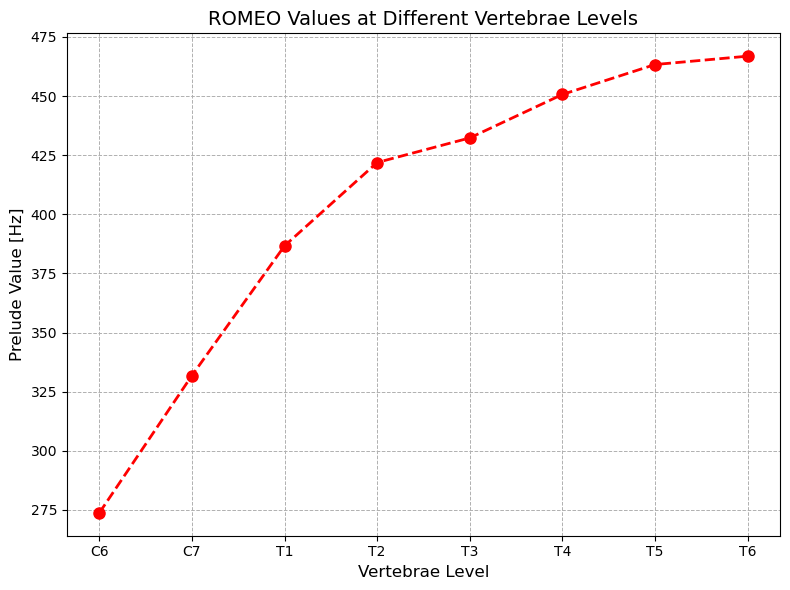

In [20]:
# Data for vertebrae levels and prelude values
vertebrae_levels = ['C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6']
romeo_body_mask = [273.76, 331.83, 386.67, 421.9, 432.3, 450.67, 463.32, 466.86]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(vertebrae_levels, prelude_values, marker='o', color='r', linestyle='--', linewidth=2, markersize=8)

# Add titles and labels
plt.title('ROMEO Values at Different Vertebrae Levels', fontsize=14)
plt.xlabel('Vertebrae Level', fontsize=12)
plt.ylabel('Prelude Value [Hz]', fontsize=12)

# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Data for vertebrae levels and prelude values
vertebrae_levels = ['C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6']
sim_0hz = [668.2, 609.7, 644.9, 634.7, 626.3, 633.46, 664.18, 632.91]
sim_1hz = [667.6, 609.2, 644.4, 634.7, 626.1, 633.38 664.29, 633.00]
sim_2hz = [667, 608.6, 644.4, 634.7, 626, 633.28, 664.39, 633.08]
sim_3hz = [666.4, 608.1, 644.3, 634.6, 625.9, 633.18, 664.5, 633.16]


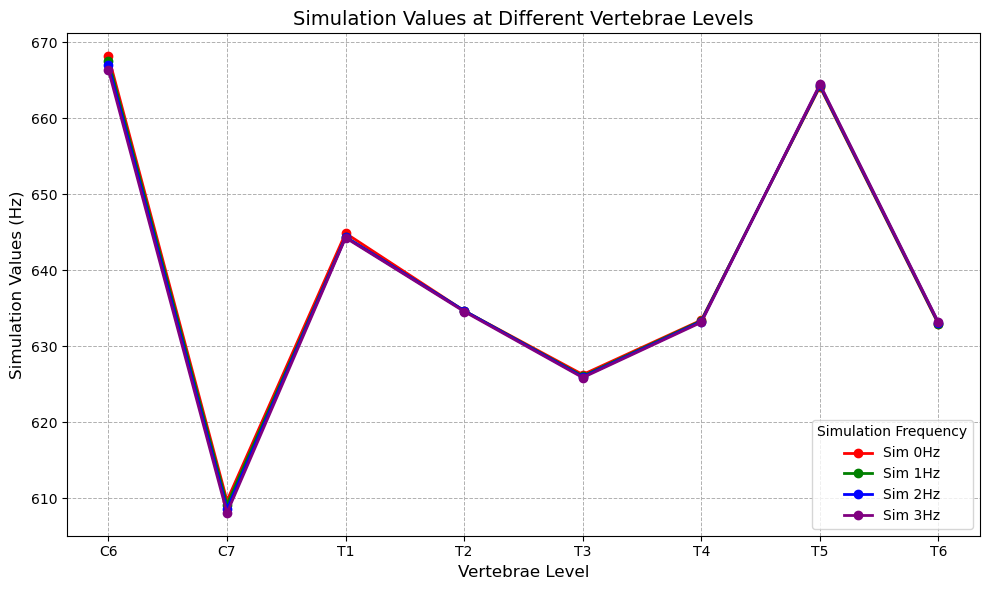

In [21]:
# Data for vertebrae levels and values from Simulated FM
vertebrae_levels = ['C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6']
sim_0hz = [668.2, 609.7, 644.9, 634.7, 626.3, 633.46, 664.18, 632.91]
sim_1hz = [667.6, 609.2, 644.4, 634.7, 626.1, 633.38, 664.29, 633.00]
sim_2hz = [667, 608.6, 644.4, 634.7, 626, 633.28, 664.39, 633.08]
sim_3hz = [666.4, 608.1, 644.3, 634.6, 625.9, 633.18, 664.5, 633.16]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each simulation set with different line styles and colors
plt.plot(vertebrae_levels, sim_0hz, marker='o', linestyle='-', color='r', label='Sim 0Hz', linewidth=2)
plt.plot(vertebrae_levels, sim_1hz, marker='o', linestyle='-', color='g', label='Sim 1Hz', linewidth=2)
plt.plot(vertebrae_levels, sim_2hz, marker='o', linestyle='-', color='b', label='Sim 2Hz', linewidth=2)
plt.plot(vertebrae_levels, sim_3hz, marker='o', linestyle='-', color='purple', label='Sim 3Hz', linewidth=2)

# Add titles and labels
plt.title('Simulation Values at Different Vertebrae Levels', fontsize=14)
plt.xlabel('Vertebrae Level', fontsize=12)
plt.ylabel('Simulation Values (Hz)', fontsize=12)

# Add a legend
plt.legend(title='Simulation Frequency')

# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()


# Comparing different Field Map processing algorithms

In [11]:
# Original PRELUDE fieldmap from Behrouz processing with Shimming-Toolbox
#C1 to T7
prelude_values = [36.9957, 37.7803, 49.412, 100.721, 161.667, 235.243, 266.895, 223.096, 144.833, 124.48, 121.84, 108.41, 96.69, 91.88]
romeo_3_echoes = [46, 47.78, 61.18, 119.09, 190.46, 270.8, 308.63, 256.27, 171.73, 145.12, 137.51, 124.7, 113.77, 106.44]
vertebrae_levels_c1_t7 = ['C1','C2','C3','C4','C5','C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6','T7']


14

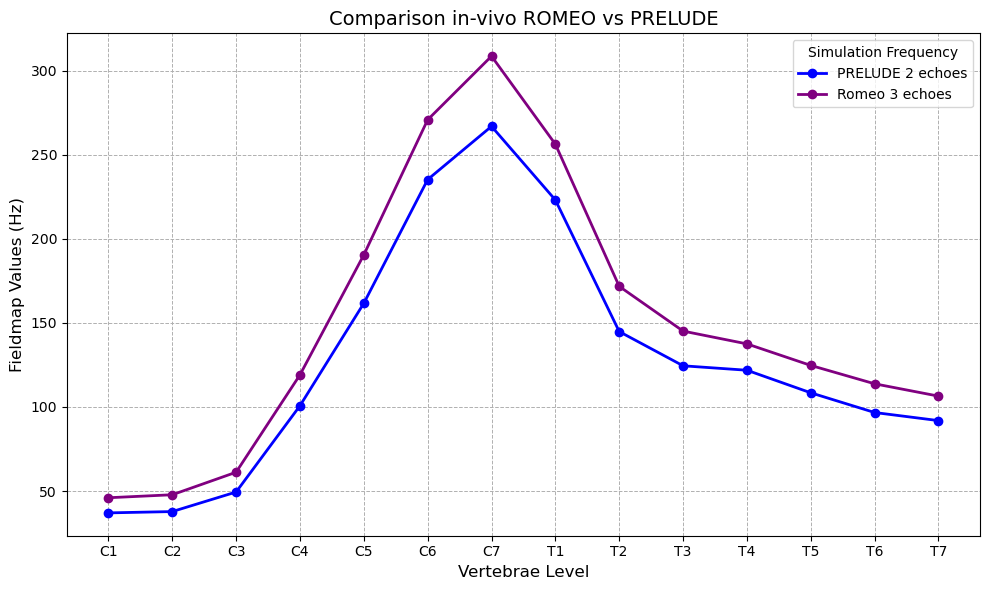

In [13]:
# Now comparing all of them together

# Data for vertebrae levels and values from Simulated FM
vertebrae_levels = ['C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6']
sim_1hz = [667.6, 609.2, 644.4, 634.7, 626.1, 633.38, 664.29, 633.00]
romeo_body_mask = [273.76, 331.83, 386.67, 421.9, 432.3, 450.67, 463.32, 466.86]
romeo_all_fov = [268.5, 279, 351, 412.3, 437.5, 445.1, 439.4, 464.2]


# Create the plot
plt.figure(figsize=(10, 6))

# Plot each simulation set with different line styles and colors
#plt.plot(vertebrae_levels, sim_1hz, marker='o', linestyle='-', color='r', label='Sim 0Hz', linewidth=2)
#plt.plot(vertebrae_levels, romeo_body_mask, marker='o', linestyle='-', color='g', label='romeo_body_mask', linewidth=2)
plt.plot(vertebrae_levels_c1_t7, prelude_values, marker='o', linestyle='-', color='b', label='PRELUDE 2 echoes', linewidth=2)
plt.plot(vertebrae_levels_c1_t7, romeo_3_echoes, marker='o', linestyle='-', color='purple', label='Romeo 3 echoes', linewidth=2)

# Add titles and labels
plt.title('Comparison in-vivo ROMEO vs PRELUDE', fontsize=14)
plt.xlabel('Vertebrae Level', fontsize=12)
plt.ylabel('Fieldmap Values (Hz)', fontsize=12)

# Add a legend
plt.legend(title='Simulation Frequency')

# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Comparing MB. Whole Spine FM vs our cervical FOV

In [13]:
simulated_custom6

[-180.06,
 -184.62,
 -176.44,
 -167.33,
 -195.04,
 -237.48,
 -249.12,
 -249.47,
 -247.45,
 -222.32,
 -151.6]

In [34]:
scan_demod_factor = 166.90
scan_demodded_measured = [romeo_all_fov[i] - scan_demod_factor for i in range(len(romeo_all_fov))]
demod_AMU_VC = -122.76
demodded_AMU_VC = [amu_VC[i] - demod_AMU_VC for i in range(len(amu_VC))]
# Sometimes theres values extra on different field of views
simulated_custom4_padded = [-120,-120,-120,-121.18, -124.086, -119.14, -108.53, -129.45,-154.95,-150.4,-147.33,-158.98,-167.47,-151.59, -152]

len(simulated_custom4_padded)

15

In [29]:
# In case the simulated FM has different size, use None to complete:
simulated_custom6_padded = [None, None, None, -180.06,-184.62,-176.44,-167.33,-195.04,-237.48,-249.12,-249.47,-247.45,-222.32,-151.6, -117.69]
simulated_custom6_crop_padded = [ None, None, None, -67.95, -46.48, -17.50, 5.9, -15.80, -61.53, -79.25, -90.59, -106.72, -111.92, -91.56, -96.68]

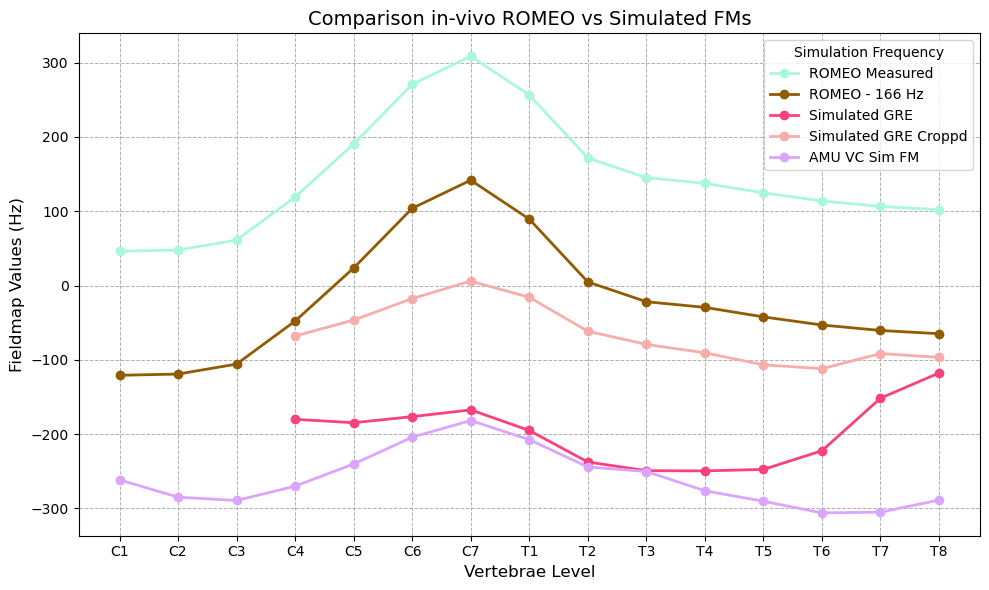

In [35]:
# Create the plot
plt.figure(figsize=(10, 6))


# Plot each simulation set with different line styles and colors
plt.plot(vertebrae_levels_c1_t8, romeo_all_fov, marker='o', linestyle='-', color='#AAF8DC', label='ROMEO Measured', linewidth=2)
plt.plot(vertebrae_levels_c1_t8, scan_demodded_measured, marker='o', linestyle='-', color='#915B03', label='ROMEO - 166 Hz', linewidth=2)

plt.plot(vertebrae_levels_c1_t8, simulated_custom6_padded, marker='o', linestyle='-', color='#FB417C', label='Simulated GRE', linewidth=2)
plt.plot(vertebrae_levels_c1_t8, simulated_custom6_crop_padded, marker='o', linestyle='-', color='#F8ADAA', label='Simulated GRE Croppd', linewidth=2)


plt.plot(vertebrae_levels_c1_t8, amu_VC, marker='o', linestyle='-', color='#DBA5FD', label='AMU VC Sim FM', linewidth=2)

# Add titles and labels
plt.title('Comparison in-vivo ROMEO vs Simulated FMs', fontsize=14)
plt.xlabel('Vertebrae Level', fontsize=12)
plt.ylabel('Fieldmap Values (Hz)', fontsize=12)

# Add a legend
plt.legend(title='Simulation Frequency')

# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

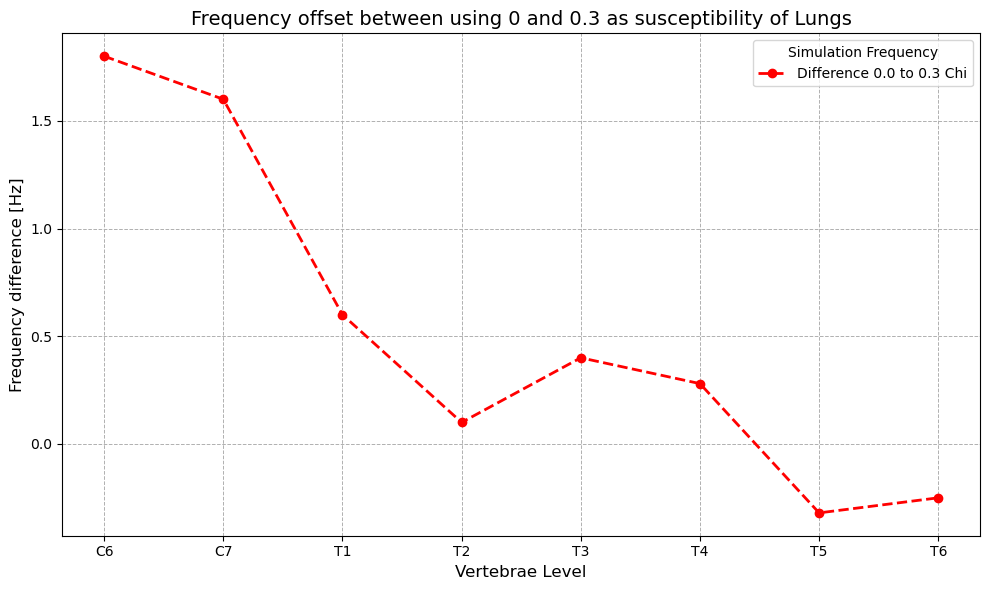

: 

In [32]:
vertebrae_levels = ['C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6']
sim_0hz = [668.2, 609.7, 644.9, 634.7, 626.3, 633.46, 664.18, 632.91]
sim_1hz = [667.6, 609.2, 644.4, 634.7, 626.1, 633.38, 664.29, 633.00]
sim_2hz = [667, 608.6, 644.4, 634.7, 626, 633.28, 664.39, 633.08]
sim_3hz = [666.4, 608.1, 644.3, 634.6, 625.9, 633.18, 664.5, 633.16]
diff_0_to_3 = [sim_0hz[i]- sim_3hz[i] for i in range(len(sim_0hz))]
# Create the plot
plt.figure(figsize=(10, 6))

# Plot each simulation set with different line styles and colors
plt.plot(vertebrae_levels, diff_0_to_3, marker='o', linestyle='--', color='r', label='Difference 0.0 to 0.3 Chi', linewidth=2)


# Add titles and labels
plt.title('Frequency offset between using 0 and 0.3 as susceptibility of Lungs', fontsize=14)
plt.xlabel('Vertebrae Level', fontsize=12)
plt.ylabel('Frequency difference [Hz]', fontsize=12)

# Add a legend
plt.legend(title='Simulation Frequency')

# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# In vivo from Tanya et al. Paper 

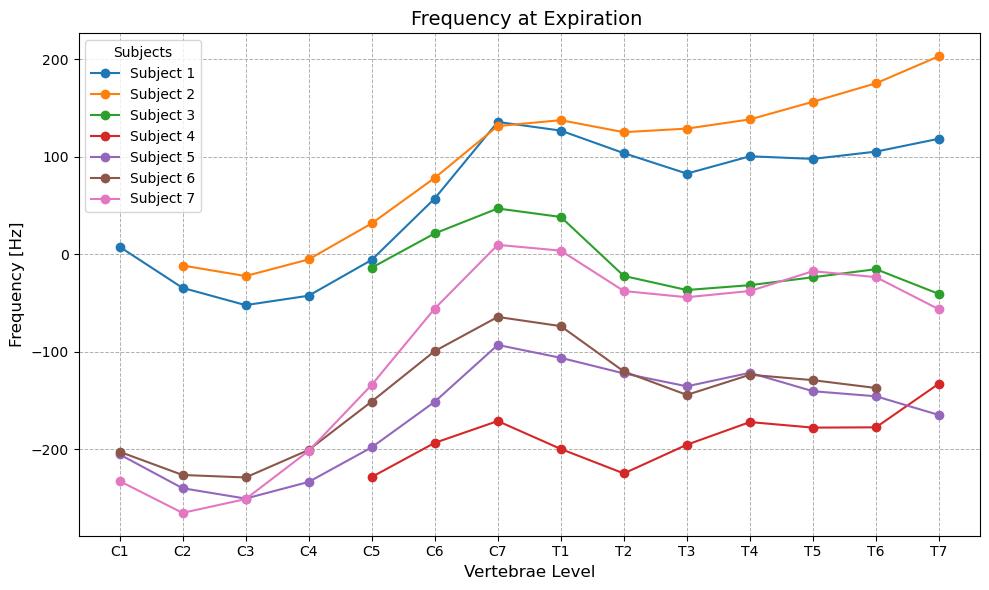

In [4]:

import matplotlib.pyplot as plt

# Vertebrae levels
vertebrae_levels = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7']

# Data for each subject
subject_1 = [7.59, -34.6007, -52.3003, -42.6437, -5.9548, 57.042, 135.5913, 126.6842, 103.5654, 82.6003, 100.3445, 97.6636, 105.1348, 118.3616]
subject_2 = [None, -11.6853, -22.4791, -5.4339, 31.4837, 78.1532, 131.36, 137.3891, 125.0578, 128.7363, 138.1833, 156.2578, 175.2279, 203.0289]
subject_3 = [None, None, None, None, -13.9386, 21.2257, 46.7966, 38.1248, -22.3754, -36.8096, -31.8351, -23.7288, -15.4443, -40.8946]
subject_4 = [None, None, None, None, -228.6019, -193.5839, -171.2021, -199.8416, -224.9235, -195.4644, -172.244, -177.9491, -177.6314, -132.7534]
subject_5 = [-205.3942, -240.0692, -250.7232, -233.6462, -198.1835, -151.4187, -93.142, -106.3501, -122.3663, -135.5931, -121.7053, -140.6057, -145.8088, -165.0143]
subject_6 = [-202.6622, -226.5181, -229.053, -200.8516, -151.2027, -99.4635, -64.4199, -73.8542, -120.3333, -144.3859, -123.7065, -129.2591, -137.3084, None]
subject_7 = [-232.7314, -265.3924, -251.2442, -201.8683, -134.113, -55.8687, 9.5106, 3.5705, -37.8451, -44.2236, -37.8199, -17.5026, -23.6079, -56.6628]

# Plot each subject's data
plt.figure(figsize=(10, 6))

plt.plot(vertebrae_levels, subject_1, marker='o', linestyle='-', label='Subject 1')
plt.plot(vertebrae_levels, subject_2, marker='o', linestyle='-', label='Subject 2')
plt.plot(vertebrae_levels, subject_3, marker='o', linestyle='-', label='Subject 3')
plt.plot(vertebrae_levels, subject_4, marker='o', linestyle='-', label='Subject 4')
plt.plot(vertebrae_levels, subject_5, marker='o', linestyle='-', label='Subject 5')
plt.plot(vertebrae_levels, subject_6, marker='o', linestyle='-', label='Subject 6')
plt.plot(vertebrae_levels, subject_7, marker='o', linestyle='-', label='Subject 7')

# Add titles and labels
plt.title('Frequency at Expiration ', fontsize=14)
plt.xlabel('Vertebrae Level', fontsize=12)
plt.ylabel('Frequency [Hz]', fontsize=12)

# Add a legend
plt.legend(title='Subjects')

# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [7]:
subject_1_new = [-12.8713, -23.303, -7.1472, 54.2169, 134.7229, 227.0454, 191.9893, 129.7039, 70.1694, 75.0041, 65.1696, 67.1581, 91.1664]
subject_2_new = [10.7813, 16.4291, 64.8201, 124.5642, 203.177, 281.7706, 222.7508, 144.5002, 110.3398, 94.5461, 95.1116, 92.5768, 115.797]
subject_3_new = [None, None, None, 68.759, 107.1569, 139.9451, 90.7787, -15.6666, -54.7061, -53.3148, -45.7928, -52.0505, -72.6472]
subject_4_new = [None, None, None, -164.595, -127.7346, -126.6101, -216.4167, -277.9714, -256.1871, -227.0772, -217.5476, -217.8526, -227.6934]
subject_5_new = [-225.7556, -234.2244, -205.5213, -160.1161, -96.9475, -35.9646, -68.2381, -118.2622, -168.3051, -168.7244, -170.8654, -165.1222, -179.3658]
subject_6_new = [-205.9043, -202.5054, -160.9249, -98.2584, -39.6323, -12.6573, -45.6169, -123.4673, -157.5324, -158.9428, -173.5166, -177.3346, None]
subject_7_new = [-255.7612, -238.0679, -189.1749, -111.9536, -31.5937, 39.5668, 30.9139, -28.773, -53.0035, -53.823, -40.9392, -40.2784, -68.4795]

# Inspiration values